In [1]:
import sys
sys.path.append('../')
import learnHeat as lh
import learnHeat3 as lh3
from importlib import reload
lh3 = reload(lh3)
lh = reload(lh)
import numpy as np
import matplotlib.pyplot as plt
import scores_table as scort

In [54]:
N = 15
L = lh.heat_graph_RBF(N)
lapl = []
X = lh.create_deltas(L,[1,2.5,4])

In [56]:
import itertools
alpha = [0, 0.01]
beta = [0, 0.05, 0.1]

for al,bet in list(itertools.product(alpha,beta)):
    result = lh.learn_heat(X,alpha=al,beta=bet,max_iter=50)
    lapl.append(result)

In [59]:
for l in lapl:
    l = l["L"]

In [62]:
lapl[0]

{'L': array([[ 1.08939915e+00, -3.32371367e-03, -1.45212586e-02,
         -1.38546119e-01,  1.99693720e-08, -8.21331495e-02,
         -3.33600872e-01, -2.42463196e-03, -2.00011409e-01,
         -5.60991605e-08, -5.53598830e-08, -8.61544899e-02,
         -4.98170944e-08, -2.28683280e-01, -8.55169901e-08],
        [-3.32371368e-03,  2.67453961e-01, -1.68155481e-02,
         -2.71620295e-02, -2.10803270e-02, -3.80954406e-02,
         -4.10681551e-02, -9.90537237e-03,  7.20569332e-08,
         -1.06628407e-02, -2.20304063e-02, -1.09359182e-02,
         -3.31463758e-02,  4.01564575e-08, -3.32279453e-02],
        [-1.45212586e-02, -1.68155481e-02,  1.37305728e+00,
         -1.30725121e-01, -7.24727261e-02, -1.43534371e-01,
         -1.61273618e-01, -1.24460518e-02, -1.25573140e-01,
         -3.71792056e-02, -4.15602909e-02, -9.91097314e-02,
         -1.40331418e-01, -1.61621865e-01, -2.15892937e-01],
        [-1.38546118e-01, -2.71620295e-02, -1.30725121e-01,
          1.22091815e+00, -1.163

In [ ]:
precision, recall = lh.heat_scores(result["L"],L,num_trials=20)

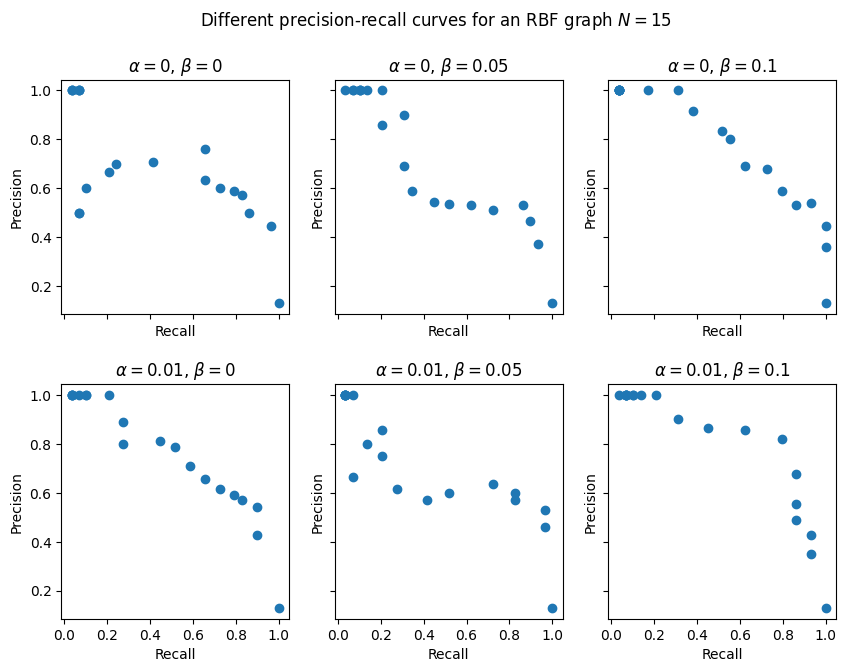

In [70]:
fig, axs = plt.subplots(2, 3, figsize=(10, 7), sharex=True, sharey=True, gridspec_kw={'hspace': 0.3})
fig.suptitle(r"Different precision-recall curves for an RBF graph $N=15$")

for i, ax in enumerate(axs.reshape(-1)):
    precision, recall = lh.heat_scores(lapl[i]["L"], L, num_trials=20)
    ax.scatter(recall, precision)
    ax.set_xticks(np.linspace(0, 1, 6))
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.set_title(fr"$\alpha=${alpha[i//3]}, $\beta=${beta[i%3]}")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(recall,precision)
plt.title("N=15,M=100,p=0.3,tau_ground=[1,2,3],se=0,alpha=0.07,beta=0.03")
plt.xlabel("Recall")
plt.ylabel("Precision")

Why does this happen? It can happen, false positives go up and then true positives go up.

In [ ]:
precision[5], precisdion[6], precision[7]